In [1]:
# fashion mnist 

import tensorflow as tf
import keras 

In [2]:
tf.__version__

'2.7.0'

In [3]:
# import the fashion mnist datasets 

fm = tf.keras.datasets.fashion_mnist

In [4]:
# split the dataset 

(x_train, y_train), (x_test, y_test) = fm.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# check the shape 

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# to visualize the dataset

import matplotlib.pyplot as plt
import seaborn as sns 

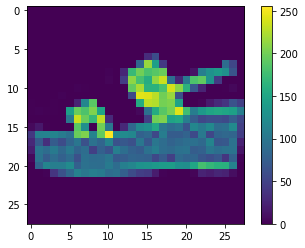

In [8]:
# let's look at the first image 

plt.figure()
plt.imshow(x_train[12])
plt.colorbar()
plt.show()

In [9]:
class_names[y_train[12]]

'Sandal'

In [10]:
# scale the image 

x_train, x_test = x_train / 255.0, x_test / 255.0

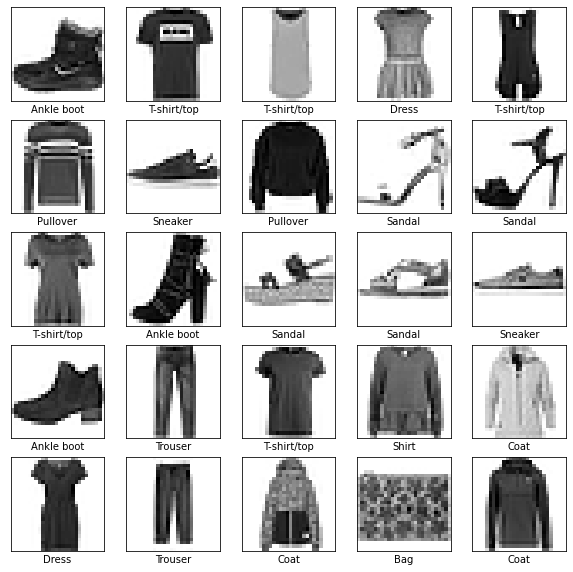

In [11]:
# let's look at other range of images 

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]]) 

plt.show()

In [12]:
# create a image color channel in training and testing dataset

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [13]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
# before training the model we are going to create a image data generator

from keras.preprocessing.image import ImageDataGenerator

In [15]:
# create a data generator function

datagen = ImageDataGenerator(
    width_shift_range = 0.005,
    horizontal_flip = True,
    height_shift_range = 0.2
)

# create a data flow

# training  

batch = datagen.flow(
    x_train,
    y_train,
    batch_size = 256
)

# validation 

validation = datagen.flow(
    x_test, 
    y_test, 
    batch_size = 256
)

In [16]:
# model architecture creation 

from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, Dropout, Flatten, Dense

In [17]:
len(class_names)

10

In [18]:
model = Sequential([
                    Input(shape=x_train[0].shape),

                    Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
                    MaxPooling2D((2, 2), padding='same'),
                    Dropout(0.5),

                    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
                    MaxPooling2D((2, 2), padding='same'),
                    Dropout(0.5),

                    Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'),
                    Dropout(0.5),
                    MaxPooling2D((2, 2), padding='same'),

                    Flatten(),

                    Dense(128, activation='relu'),

                    Dense(10, activation='softmax')
])

In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0

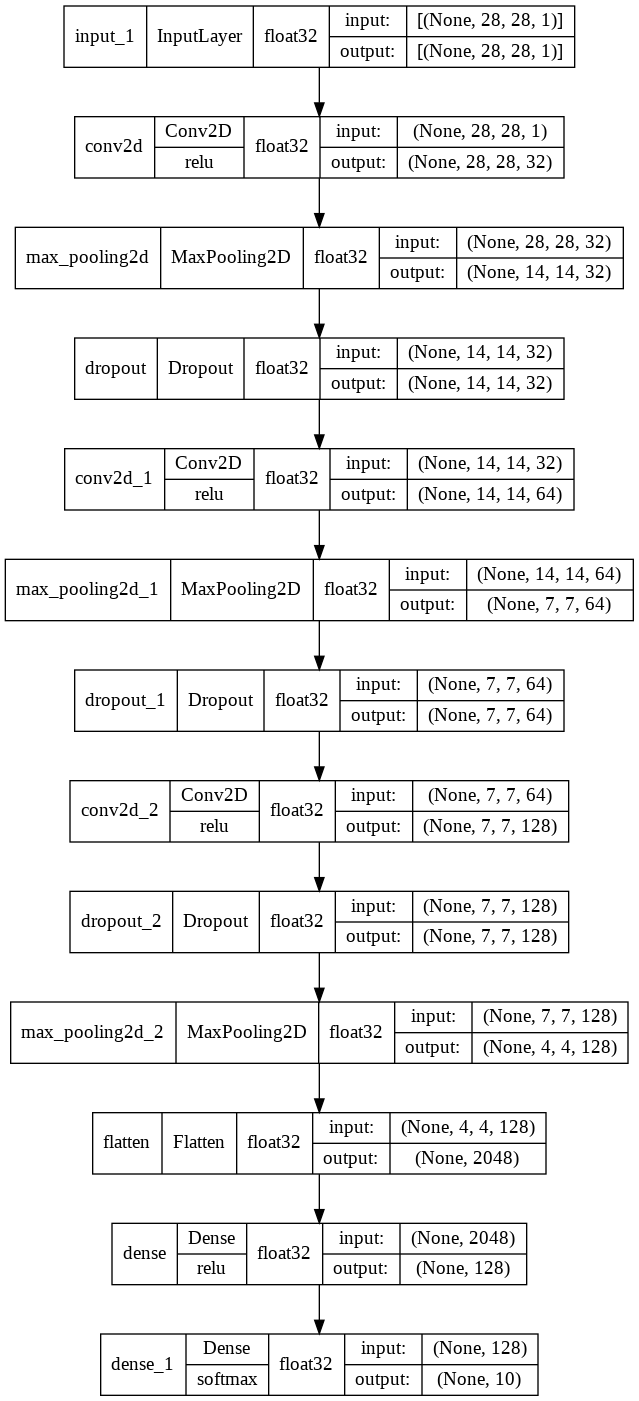

In [21]:
tf.keras.utils.plot_model(
    model,
    to_file = 'model.png',
    show_shapes = True,
    show_dtype = True,
    dpi = 96,
    layer_range = None,
    show_layer_activations = True
)

In [22]:
# train the model 

batch_size = 256

history = model.fit(
    batch,
    steps_per_epoch = x_train.shape[0]//batch_size,
    epochs = 100,
    validation_data = validation,
    validation_steps = x_test.shape[0]//batch_size, 
    use_multiprocessing = True
)

Epoch 1/100
234/234 [==============================] - 32s 86ms/step - loss: 0.9174 - accuracy: 0.6554 - val_loss: 0.7403 - val_accuracy: 0.7456
Epoch 2/100
234/234 [==============================] - 20s 87ms/step - loss: 0.6131 - accuracy: 0.7675 - val_loss: 0.5796 - val_accuracy: 0.8108
Epoch 3/100
234/234 [==============================] - 43s 185ms/step - loss: 0.5432 - accuracy: 0.7953 - val_loss: 0.5128 - val_accuracy: 0.8185
Epoch 4/100
234/234 [==============================] - 25s 107ms/step - loss: 0.4944 - accuracy: 0.8127 - val_loss: 0.4864 - val_accuracy: 0.8300
Epoch 5/100
234/234 [==============================] - 37s 156ms/step - loss: 0.4662 - accuracy: 0.8246 - val_loss: 0.4364 - val_accuracy: 0.8475
Epoch 6/100
234/234 [==============================] - 31s 131ms/step - loss: 0.4465 - accuracy: 0.8318 - val_loss: 0.4185 - val_accuracy: 0.8558
Epoch 7/100
234/234 [==============================] - 27s 114ms/step - loss: 0.4265 - accuracy: 0.8389 - val_loss: 0.4114 - v

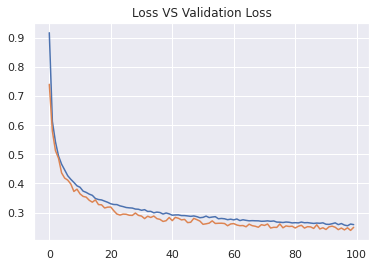

In [23]:
# plotting the loss 

sns.set_theme()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss VS Validation Loss')
plt.show()

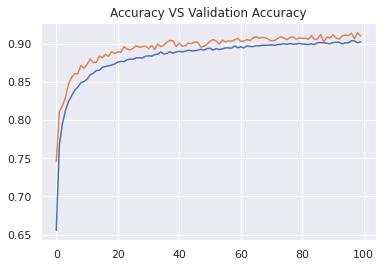

In [24]:
# plotting the accuracy 

sns.set_theme()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy VS Validation Accuracy')
plt.show()

In [25]:
model.save('model.h5')